# Se voglio ricostruire una coppia di elettroni di carica opposta come faccio?


il File c'è già! Non sarà riscaricato.
[0, 0]
--2024-09-17 12:07:09--  https://github.com/oiorio/AnalisiDati/raw/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oiorio/AnalisiDati/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root [following]
--2024-09-17 12:07:10--  https://raw.githubusercontent.com/oiorio/AnalisiDati/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2152475 (2.1M) [application/octet-stream]
Saving to: ‘DYJets.root.18’

     0K .

array('i', [2])
array('i', [0])
2
{ 53.3174f, 44.2132f }


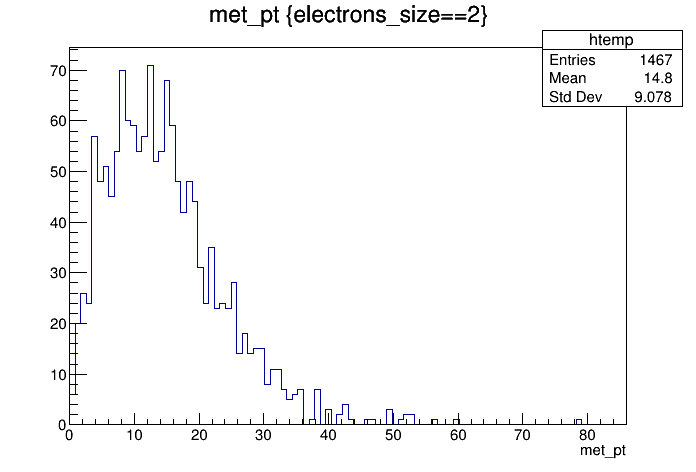

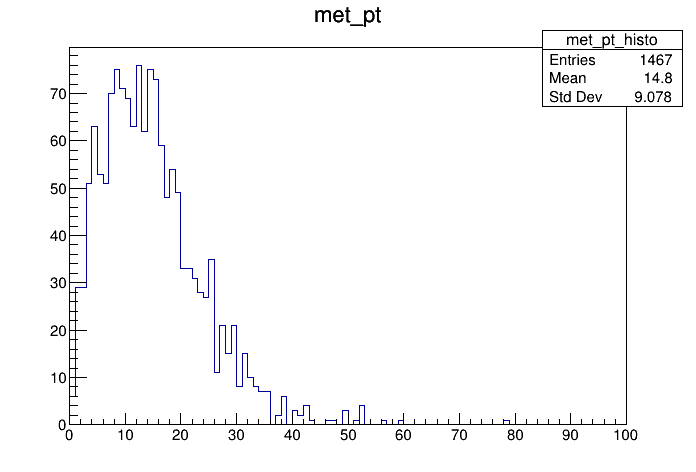

***********************************************
*    Row   * Instance * electrons * electrons *
***********************************************
*        2 *        0 *         2 *        -1 *
*        2 *        1 *         2 *         1 *
*       11 *        0 *         2 *         1 *
*       11 *        1 *         2 *        -1 *
*       13 *        0 *         2 *         1 *
*       13 *        1 *         2 *        -1 *
*       24 *        0 *         2 *         1 *
*       24 *        1 *         2 *        -1 *
*       32 *        0 *         2 *        -1 *
*       32 *        1 *         2 *         1 *
*       34 *        0 *         2 *         1 *
*       34 *        1 *         2 *        -1 *
*       39 *        0 *         2 *        -1 *
*       39 *        1 *         2 *         1 *
*       62 *        0 *         2 *         1 *
*       62 *        1 *         2 *        -1 *
*       65 *        0 *         2 *         1 *
*       65 *        1 *         2 *     

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or 

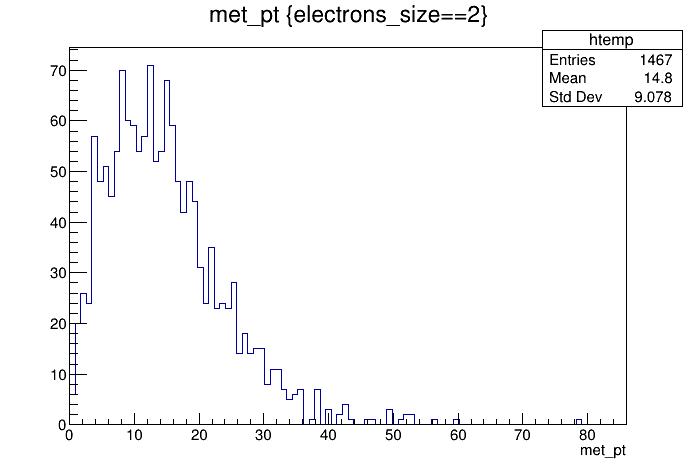

2584


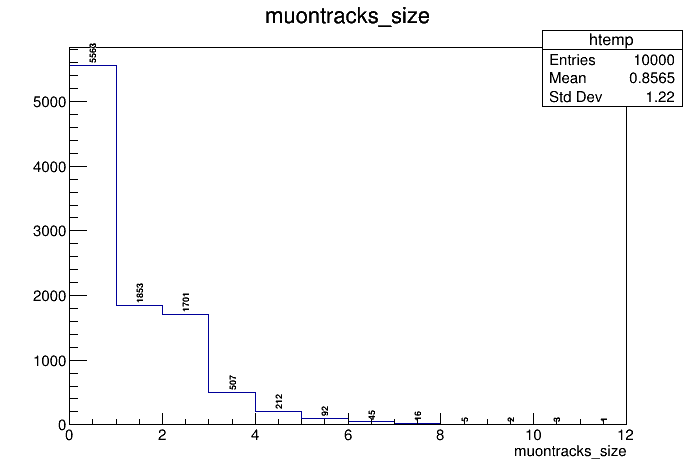

0.4465789794559582 1488.4477385267087
377.55226147329125


In [1]:
#Prima cosa: giriamo il notebook precedente 
%run ./trees_and_ntuples.ipynb

In [2]:
#Non solo l'output, anche il tree è presente!
mytree
mytree.GetEntries()

10000

## Ora facciamo un loop sugli eventi!

In [3]:
mytree.Print("muontracks*")

******************************************************************************
*Tree    :events    : events                                                 *
*Entries :    10000 : Total =         6072486 bytes  File  Size =    2146782 *
*        :          : Tree compression factor =   2.82                       *
******************************************************************************
*Br    0 :muontracks_size : muontracks_size/I                                *
*Entries :    10000 : Total  Size=      40701 bytes  File Size  =       6331 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   6.34     *
*............................................................................*
*Br    1 :muontracks_pt : vector<float>                                      *
*Entries :    10000 : Total  Size=     175439 bytes  File Size  =      71181 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression=   2.46     *
*...................................................

In [4]:
h_jet_mass = ROOT.TH1F("Jets_mass_0","Leading jet mass",100,0,100) 
for i in range (mytree.GetEntries()):
    mytree.GetEntry(i)
    #Ogni 100 eventi stampo a schermo il vettore dei jet!
    if(i%1000==0):print( "event #", i, "n jets ",mytree.jets_size, " pt: ",mytree.jets_pt)
    #Se c'è almeno 1 jet: stampo il 

    if(mytree.jets_size):
            jet_0 =ROOT.TLorentzVector()
            jet_0.SetPtEtaPhiE(mytree.jets_pt[0],mytree.jets_eta[0],mytree.jets_phi[0],mytree.jets_e[0])
            if(i%1000==0):print("leading jet pt",mytree.jets_pt[0]," mass? ",jet_0.M())
            h_jet_mass.Fill(jet_0.M())

event # 0 n jets  2  pt:  { 56.3023f, 55.8997f }
leading jet pt 56.30229949951172  mass?  5.134994026979267
event # 1000 n jets  3  pt:  { 30.0213f, 25.7592f, 22.6790f }
leading jet pt 30.02133560180664  mass?  4.819653273611887
event # 2000 n jets  2  pt:  { 45.6171f, 35.1373f }
leading jet pt 45.61709213256836  mass?  4.819771473086346
event # 3000 n jets  2  pt:  { 22.3066f, 20.7958f }
leading jet pt 22.306556701660156  mass?  6.789703805725764
event # 4000 n jets  3  pt:  { 65.5453f, 39.3958f, 35.9018f }
leading jet pt 65.54531860351562  mass?  12.201516049901832
event # 5000 n jets  2  pt:  { 58.5544f, 49.1629f }
leading jet pt 58.5544319152832  mass?  12.885972862458438
event # 6000 n jets  3  pt:  { 58.3725f, 37.2806f, 23.7087f }
leading jet pt 58.37245178222656  mass?  4.705065603508283
event # 7000 n jets  1  pt:  { 32.0088f }
leading jet pt 32.00883102416992  mass?  3.7364037975131237
event # 8000 n jets  3  pt:  { 38.3194f, 34.4998f, 20.6476f }
leading jet pt 38.319358825683

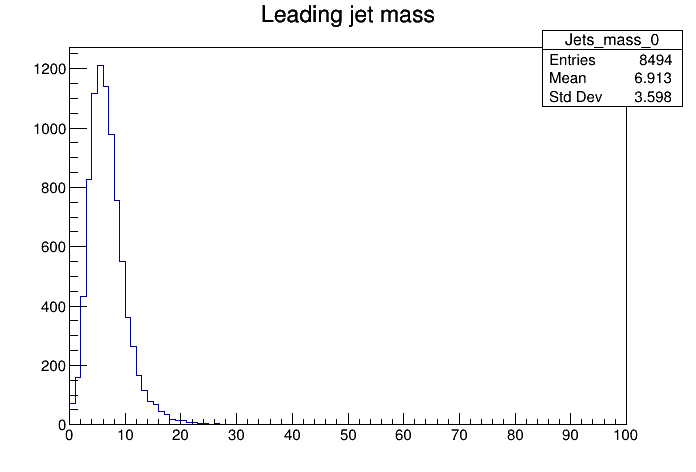

In [5]:
#Diseg
c1= ROOT.TCanvas()
c1.Draw()
h_jet_mass.Draw()





## Esercizio 1:

Proviamo a fare la somma vettoriale  di due elettroni di carica opposta e disegnarne la massa.
Facciamo lo stesso coi muoni.

### 1.1 Che forma ha questa distribuzione

### 1.2 Quante coppie avrò per evento?


## Esercizio 2: 

Proviamo a fittare la distribuzione che viene fuori, ad es. con gauss + expo, o... altro?


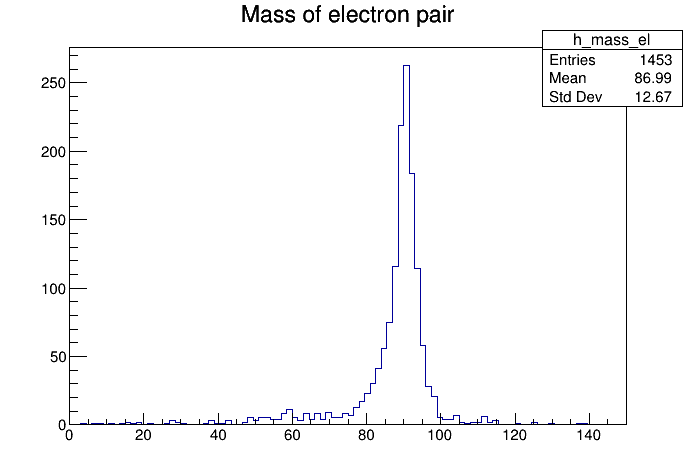

In [6]:
m_min=0
m_max=150
h_mass_el=ROOT.TH1F("h_mass_el","Mass of electron pair",100,m_min,m_max)
h_mass_mu=ROOT.TH1F("h_mass_mu","Mass of muon pair",100,m_min,m_max)



for i in range(mytree.GetEntries()):
#for i in range(100):
    mytree.GetEntry(i)
    for ei in range(mytree.electrons_size):
        for ej in range(ei):
            if mytree.electrons_charge[ei]* mytree.electrons_charge[ej]<0:
                e1=  ROOT.TLorentzVector()
                e2=ROOT.TLorentzVector()
                e1.SetPtEtaPhiE(mytree.electrons_pt[ei],mytree.electrons_eta[ei],mytree.electrons_phi[ei],mytree.electrons_e[ei])
                e2.SetPtEtaPhiE(mytree.electrons_pt[ej],mytree.electrons_eta[ej],mytree.electrons_phi[ej],mytree.electrons_e[ej])
                h_mass_el.Fill((e1+e2).M())


c1=ROOT.TCanvas("masses")
c1.Draw()
h_mass_el.Draw()

In [7]:
#Let's take a step further - a bit less monke

#1 Classe "particella"
class particle:
    def __init__(self, pt,eta,phi,e,charge,flavor):
        self.pt=pt
        self.eta=eta
        self.phi=phi
        self.e=e
        self.charge=charge
        self.flavor=flavor
        self.p4 = ROOT.TLorentzVector()
        self.p4.SetPtEtaPhiE(pt,eta,phi,e)
        
#2 Metodo per estrarla:    
def get_particle(tree=mytree,var="muontracks",index=0):
    flav_dict={"muontracks":13,"electrons":11}
    p= particle(getattr(tree,var+"_pt")[index],#getattr chiama dall'esterno un attributo con il nome preso come stringa
                getattr(tree,var+"_eta")[index],
                getattr(tree,var+"_phi")[index],
                getattr(tree,var+"_e")[index],
                getattr(tree,var+"_charge")[index] if hasattr(tree,var+"_charge") else 0,#nota: questo per i jet fallirà se non faccio qualcosa!
                -1*getattr(tree,var+"_charge")[index]*(flav_dict[var]) if hasattr(tree,var+"_charge") else 0)
    return p

def get_collection(tree=mytree,var="muontracks"):
    particles=[get_particle(tree,var,i) for i in range(getattr(tree,var+"_size"))]
    return particles

In [32]:
are_os = lambda x,y: x.charge*y.charge<0 #Uso lambda per vedere se sono segno opposto (opposite sign)
are_ss = lambda x,y: x.charge*y.charge>0 # o same sign (ss) -> quest'ultimo è ridondante in realtà!
selezione = lambda x: x.pt > 30 # => diventa una selezione su chi2, dB, dZ, isoDeposits 

h_mass_mu.Reset("ICES")

h_mass_mu_ss=h_mass_mu.Clone("h_mass_mu_os")

#definisco un istogramma di dB per muoni "buoni" e muoni "cattivi":
h_dB_mu_s = ROOT.TH1F("dB_s","dB signal",1000,0,0.1)
h_dB_mu_b = ROOT.TH1F("dB_b","dB background",1000,0,0.1)


for i in range(mytree.GetEntries()):
#for i in range(100):
    mytree.GetEntry(i)
    muons=get_collection(mytree,"muontracks")
    electrons=get_collection(mytree,"electrons")
    jets=get_collection(mytree,"jets")
   
    for mi in range(len(muons)):
        for mj in range(mi):
            if(are_os(muons[mi],muons[mj])):
                mZ= (muons[mi].p4+muons[mj].p4).M()
                #if(mytree.muontracks_mctruthmatch[mi] and mytree.muontracks_mctruthmatch[mj] and mZ > -80 and mZ < 1100):
                h_mass_mu.Fill(mZ)
                h_dB_mu_s.Fill(mytree.muontracks_dB[mi])
                h_dB_mu_s.Fill(mytree.muontracks_dB[mj])
            else:
#                if(not mytree.muontracks_mctruthmatch[mi] and not mytree.muontracks_mctruthmatch[mj] and mZ < 1180):
                if( mZ < 1180):
                
                    h_mass_mu_ss.Fill((muons[mi].p4+muons[mj].p4).M())
                    h_dB_mu_b.Fill(mytree.muontracks_dB[mi])
                    h_dB_mu_b.Fill(mytree.muontracks_dB[mj])
                
            #if(selezione(muons[mi])and selezione(muons[mj])):
                #il muone è considerato buono ed è salvato per usi successivi
                #h_mass_mu_good.Fill()
                
            
c1.Draw()
h_mass_mu.Draw()
h_mass_mu_ss.SetLineColor(ROOT.kRed)
h_mass_mu_ss.Draw("same")

Warning in <TFile::Append>: Replacing existing TH1: dB_s (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: dB_b (Potential memory leak).


In [30]:
%jsroot on
c1.Draw()
h_dB_mu_s.DrawNormalized()

h_dB_mu_b.SetLineColor(ROOT.kRed)
h_dB_mu_b.DrawNormalized("same")

print("overflow s", h_dB_mu_s.GetBinContent(99999)/h_dB_mu_s.Integral())
print("overflow b", h_dB_mu_b.GetBinContent(99999)/h_dB_mu_b.Integral())

overflow s 0.07907463076721997
overflow b 0.18663442514838427


In [22]:
mytree.Print("muontracks_*")

******************************************************************************
*Tree    :events    : events                                                 *
*Entries :    10000 : Total =         6072486 bytes  File  Size =    2146782 *
*        :          : Tree compression factor =   2.82                       *
******************************************************************************
*Br    0 :muontracks_size : muontracks_size/I                                *
*Entries :    10000 : Total  Size=      40701 bytes  File Size  =       6331 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   6.34     *
*............................................................................*
*Br    1 :muontracks_pt : vector<float>                                      *
*Entries :    10000 : Total  Size=     175439 bytes  File Size  =      71181 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression=   2.46     *
*...................................................

In [23]:
c1.Draw()
h_mass_mu_ss.SetLineColor(ROOT.kRed)
h_mass_mu_ss.Draw("same")
c1.SetLogy()

m_min_fit=10
bkg = ROOT.TF1("expo_bkg_1","[0]/[1]*exp(-x/[1])",m_min_fit,m_max)
bkg.SetParameters(1000,20)
h_mass_mu_ss.Fit(bkg,"SR")

 FCN=93.3245 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=3.97392e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.67172e+03   1.65904e+02   4.74413e-01  -9.61526e-07
   2  p1           1.15034e+01   6.32761e-01   1.81085e-03   2.17712e-04


 FCN=21.0856 FROM MIGRAD    STATUS=CONVERGED    1178 CALLS        1179 TOTAL
                     EDM=1.18877e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.20680e+05   2.14030e+05   1.32180e+01   4.21514e-09
   2  p1           8.55368e+02   1.67053e+02   4.40225e-02   2.09466e-06
   3  p2           2.76941e+02   3.38564e+01   6.18428e-03   2.15608e-04
   4  p3          -4.08330e+00   4.37314e-01   8.76113e-05   3.16372e-02
   5  p4           1.70575e-02   1.93254e-03   7.05496e-07   3.78985e+00


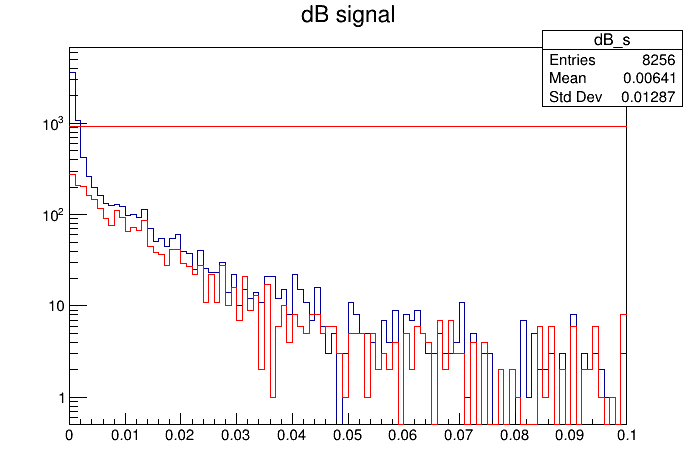

In [12]:
#Forse si può migliorare un po'...
m_min_fit= 10
bkg2 = ROOT.TF1("expo_bkg_2","[0]/[1]*exp(-([2]*x+[3]*x*x+[4]*x*x*x)/[1])",m_min_fit,m_max)
bkg2.SetParameters(1000,20,1,1,0.1)
c1.Draw()
h_mass_mu_ss.Fit(bkg2,"SR")

binwidth  1.5
nentries  2645.0
sigbkgint  2466.9684857900183
 FCN=125.874 FROM HESSE     STATUS=OK             61 CALLS        2429 TOTAL
                     EDM=1.117e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.66734e+05   2.44283e+04   4.18736e+00  -4.17471e-08
   2  p1           1.66643e+02   2.14837e+01   1.95391e-03  -2.31047e-04
   3  p2           2.22224e+03   6.76907e+01   7.17879e-02  -1.03848e-05
   4  p3           9.07507e+01   8.02305e-02   8.69398e-05  -8.70238e-03
   5  p4           3.05627e+00   1.02292e-01   1.05798e-04  -1.09484e-02
   6  p5           3.88406e+01   4.25450e+00   1.18340e-04   5.19649e-03
   7  p6          -6.31266e-01   6.83205e-02   1.49460e-06   4.32541e-01
   8  p7           3.24758e-03   3.54495e-04   1.59101e-08   3.59273e+01


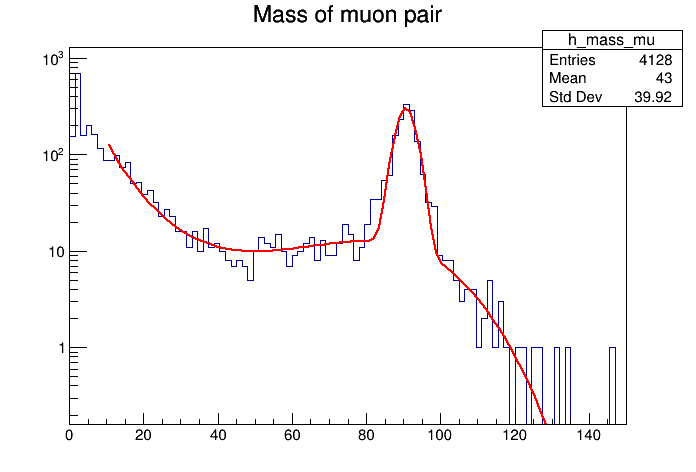

In [13]:
sigbkg = ROOT.TF1("sig_bkg","[0]/[1]*exp(-([5]*x+[6]*x*x+[7]*x*x*x)/[1])+[2]*1/([4]*TMath::Sqrt(2*TMath::Pi()))*exp(-(x-[3])*(x-[3])/(TMath::Sqrt(2)*[4]*[4]))",m_min_fit,m_max)
sigbkg.SetParameters(1000,20,1000,90,10,1,1,0.1)
c1.Draw()
h_mass_mu.Fit(sigbkg,"SRM")
print("binwidth ",h_mass_mu.GetBinWidth(1))
print("nentries ", h_mass_mu.Integral(h_mass_mu.FindBin(10),200))
print("sigbkgint ",sigbkg.Integral(10,120)/1.5)



In [14]:
h_mass_mu.Integral(h_mass_mu.FindBin(70))

TypeError: none of the 2 overloaded methods succeeded. Full details:
  double TH1::Integral(const char* option = "") =>
    TypeError: could not convert argument 1 (bad argument type for built-in operation)
  double TH1::Integral(int binx1, int binx2, const char* option = "") =>
    TypeError: takes at least 2 arguments (1 given)

In [ ]:
bkg_only = ROOT.TF1("bkg_only","[0]/[1]*exp(-([2]*x+[3]*x*x+[4]*x*x*x)/[1])",m_min_fit, m_max)
p0 = sigbkg.GetParameter(0)
p1 = sigbkg.GetParameter(1)
p5 = sigbkg.GetParameter(5)
p6 = sigbkg.GetParameter(6)
p7 = sigbkg.GetParameter(7)
bkg_only.SetParameters(p0,p1,p5,p6,p7)
c1.Draw()
bkg_only.Draw()
bkg_only.Integral(m_min_fit,m_max)
#c1.SetLogy(1)


In [ ]:

p0 = bkg2.GetParameter(0)
p1 = bkg2.GetParameter(1)
p5 = bkg2.GetParameter(2)
p6 = bkg2.GetParameter(3)
p7 = bkg2.GetParameter(4)
bkg_only.SetParameters(p0,p1,p5,p6,p7)
c1.Draw()
bkg_only.Draw()
bkg_only.Integral(m_min_fit,m_max)
c1.SetLogy(1)


In [ ]:
#%jsroot off

sig_only = ROOT.TF1("sig_only","[0]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-(x-[2])*(x-[2])/(TMath::Sqrt(2)*[1]*[1]))",80, 100)
p2 = sigbkg.GetParameter(2)
p3 = sigbkg.GetParameter(3)
p4 = sigbkg.GetParameter(4)
sig_only.SetParameters(p2,p4,p3)
c2= ROOT.TCanvas()
c2.Draw()
#c2.SetLogy(0)
sig_only.Draw()
sig_only.Integral(m_min_fit,m_max)


# Esercizio #1 

Proviamo a stimare il numero di eventi sotto il picco con il fit in due modi diversi : fit s+b, fit b.

# Esercizio #2 


Confrontiamo la nostra definizione di massa con la definizione "cut based"

# Esercizio #3


Definita la nostra selezione (es. massa >40 GeV) proviamo a studiare le altre features della muontrack:

chi2 -> chi2 del fit alla traccia
dz -> parametro di impatto lungo Z
dB -> parametro di impatto nel piano xy
isodeposits -> depositi calorimetrici intorno al muone

In [ ]:
mytree.Scan("muontracks_chi2:muontracks_dz:muontracks_dB:muontracks_isoDeposits","","",10)

In [ ]:
c3 = ROOT.TCanvas()
c3.Draw()
c3.SetLogy()
mytree.Draw("muontracks_dz","muontracks_dz<50")

In [ ]:
Dz_prompt_muon = ROOT.TH1F("Dz_prompt_muon","Dz of prompt muons",100,0,50)
for i in range(mytree.GetEntries()):
#for i in range(100):
    mytree.GetEntry(i)
    muons=get_collection(mytree,"muontracks")
    electrons=get_collection(mytree,"electrons")
    jets=get_collection(mytree,"jets")
    for mi in range(len(muons)):
        for mj in range(mi):
            if(are_os(muons[mi],muons[mj])):
                   if (muons[mi].p4+muons[mj].p4).M()>70:
                        Dz_prompt_muon.Fill(mytree.muontracks_dz[mj])
                        Dz_prompt_muon.Fill(mytree.muontracks_dz[mi])

c4= ROOT.TCanvas()
c4.Draw()
c4.SetLogy()
Dz_prompt_muon.Draw()

#A)mu+,B) mu-,C)mu+
#(AB),(BC)                      
#non sto prendendo BA e CB , ma il muone B potrebbe essere contato due volte!

            


# Esercizio #4:

Proviamo su questo campione "mixed" di dati

In [ ]:
dataFile= ROOT.TFile("Data.root")
#Nota: io l'ho scaricato in locale - potete fare lo stesso o usare il wget as you prefer :)

In [ ]:
datatree= dataFile.trees.events
datatree.GetEntries()

In [ ]:
h_data_mass_mu_os=ROOT.TH1F("h_data_mu_os","Mass of muon pair, data",1500,m_min,m_max)
h_data_mass_mu_ss=h_data_mass_mu_os.Clone("h_data_mu_ss")

for i in range(datatree.GetEntries()):
#for i in range(100):
    datatree.GetEntry(i)
    muons=get_collection(datatree,"muontracks")
    electrons=get_collection(datatree,"electrons")
    jets=get_collection(datatree,"jets")
   
    for mi in range(len(muons)):
        for mj in range(mi):
            if(are_os(muons[mi],muons[mj])):
                h_data_mass_mu_os.Fill((muons[mi].p4+muons[mj].p4).M())
            else:
                h_data_mass_mu_ss.Fill((muons[mi].p4+muons[mj].p4).M())


In [ ]:
c5 = ROOT.TCanvas()
c5.Draw()
h_data_mass_mu_os.Draw()
h_data_mass_mu_ss.SetLineColor(ROOT.kRed)
h_data_mass_mu_ss.Draw("same")
h_data_mass_mu_os.GetXaxis().SetRangeUser(0,140)
#h_data_mass_mu_os.Rebin(2)
#h_data_mass_mu_ss.Rebin(2)
c5.SetLogy()
c5.Update()

